In [20]:

import matplotlib as plt
import numpy as np 
import seaborn as sns 
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report
import joblib 


In [21]:
diabete=pd.read_csv("data\diabetes.csv")
diabete.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
diabete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Division de la base de données en deux et Modélisation Random Forest 

In [27]:
x = diabete.drop('Outcome', axis=1)
y = diabete['Outcome']

#Division de la base de données 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


Entrainement du modele

In [30]:
from sklearn.ensemble import RandomForestClassifier

# Calculer le nombre maximum de variables (max_features) à la racine carrée
max_features = int(np.sqrt(x.shape[1]))

# Créer la forêt aléatoire avec les hyperparamètres fixés
random_forest = RandomForestClassifier(n_estimators=100, max_features=max_features, random_state=42,oob_score=True)

# Entraîner le modèle sur les données d'entraînement
random_forest.fit(x_train, y_train)

RandomForestClassifier(max_features=2, oob_score=True, random_state=42)

Prediction sur les bases train et test

In [31]:
import pandas as pd
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score

# Prédire les classes sur les ensembles d'entraînement et de test
y_train_pred = random_forest.predict(x_train)
y_test_pred = random_forest.predict(x_test)

Performances du modele

In [32]:
# Calculer les mesures de performance
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_auc = roc_auc_score(y_train, y_train_pred)
test_auc = roc_auc_score(y_test, y_test_pred)
train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

# Créer le tableau d'évaluation des performances
performance_table = pd.DataFrame({
    'Métrique': ['Accuracy', 'AUC', 'Recall'],
    'Ensemble d\'entraînement': [train_accuracy, train_auc, train_recall],
    'Ensemble de test': [test_accuracy, test_auc, test_recall]
})

# Afficher le tableau d'évaluation des performances
print(performance_table)

   Métrique  Ensemble d'entraînement  Ensemble de test
0  Accuracy                      1.0          0.720779
1       AUC                      1.0          0.697980
2    Recall                      1.0          0.618182


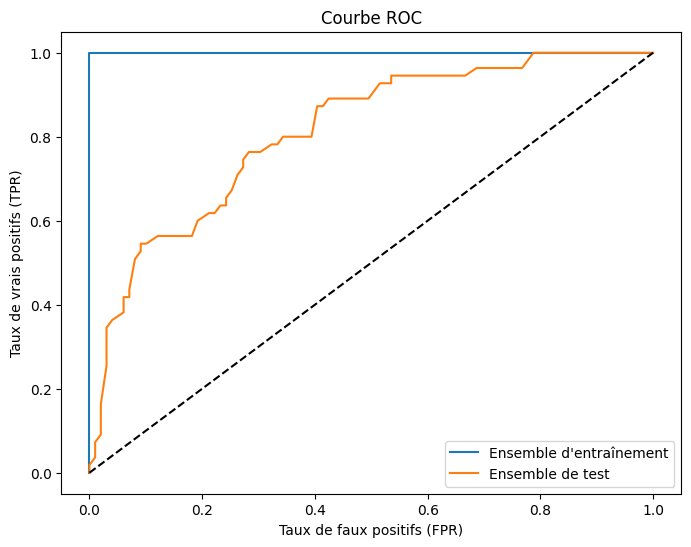

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Obtenir les scores de probabilité pour les classes positives
y_train_prob = random_forest.predict_proba(x_train)[:, 1]
y_test_prob = random_forest.predict_proba(x_test)[:, 1]

# Calculer les taux de faux positifs (FPR) et les taux de vrais positifs (TPR)
train_fpr, train_tpr, _ = roc_curve(y_train, y_train_prob)
test_fpr, test_tpr, _ = roc_curve(y_test, y_test_prob)

# Tracer les courbes ROC
plt.figure(figsize=(8, 6))
plt.plot(train_fpr, train_tpr, label='Ensemble d\'entraînement')
plt.plot(test_fpr, test_tpr, label='Ensemble de test')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC')
plt.legend()
plt.show()

Impoortance des variables 

Importance des variables :
                   Variable  Importance
0                   Glucose    0.258864
1                       BMI    0.169984
2                       Age    0.140931
3  DiabetesPedigreeFunction    0.123768
4             BloodPressure    0.088134
5               Pregnancies    0.076551
6                   Insulin    0.076122
7             SkinThickness    0.065646



Text(0.5, 1.0, 'Importance des variables')

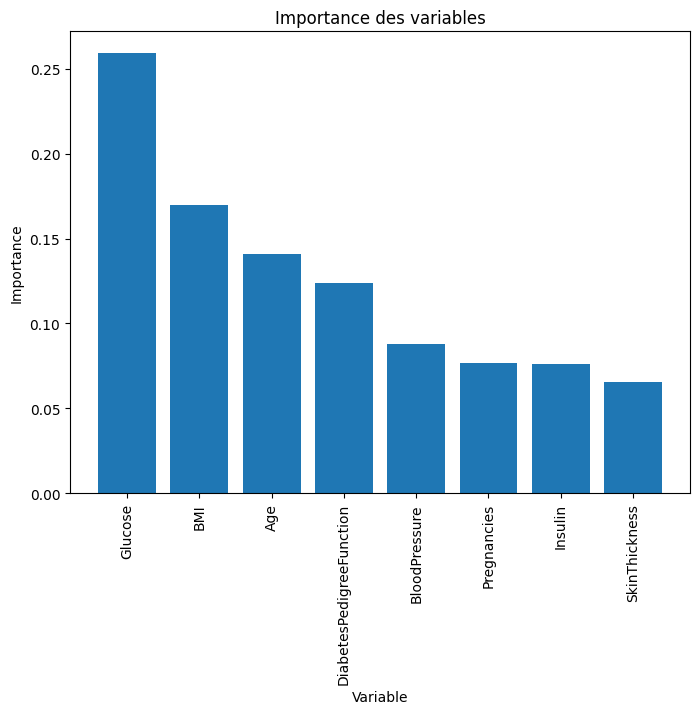

In [35]:
# Obtenir l'importance des variables
importance = random_forest.feature_importances_

# Créer un DataFrame pour afficher l'importance des variables
importance_df = pd.DataFrame({'Variable': x.columns, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Afficher l'importance des variables
print("Importance des variables :")
print(importance_df)
print()

# Tracer l'importance des variables
plt.figure(figsize=(8, 6))
plt.bar(importance_df['Variable'], importance_df['Importance'])
plt.xticks(rotation='vertical')
plt.xlabel('Variable')
plt.ylabel('Importance')
plt.title('Importance des variables')

In [42]:
# Enrégistrement du modele

# Enregistrer le modèle
joblib.dump(random_forest, 'random_forest_model.pkl')


['random_forest_model.pkl']